# Non-linear Regression Analysis

To study different forms of non-linear regression

Import the required mobules:

In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

%matplotlib inline

There are 6 main forms of regressions, represented algebraically as:

Linear: $$y = mx + c$$

Quadratic: $$y = ax^2 + bx + c$$

Cubic: $$y = ax^3 + bx^2 + cx + d$$

Exponential: $$y = e^x$$

Logarithmic: $$y = \log (x)$$

Sigmoidal: $$y = a + \frac{b}{1 + c^{(x -d)}}$$

Note that the polynomial functions can continue to infinity, but they aren't much useful in most cases concerning machine learning.

These equations can be graphically represented as:

<ipython-input-2-cce48272129f>:6: RuntimeWarning: invalid value encountered in log
  y_log = np.log(x)


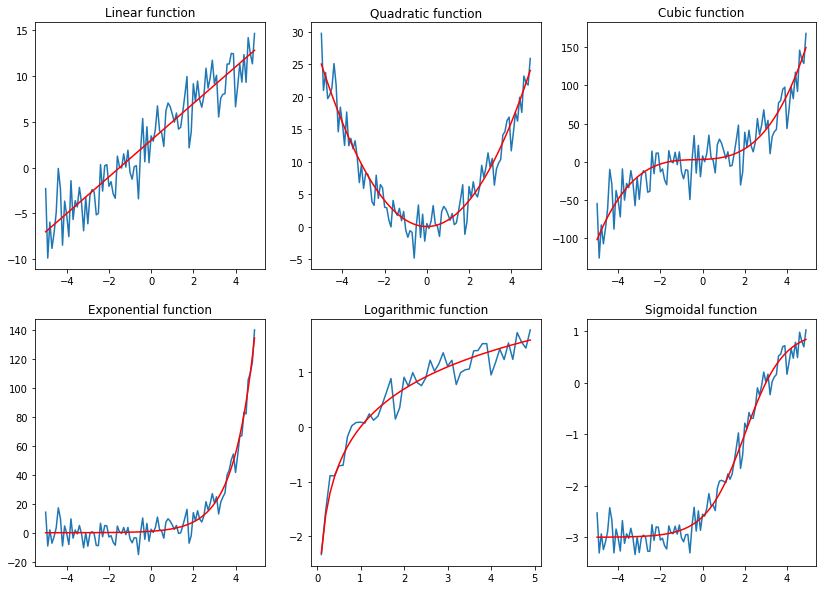

In [2]:
x = np.arange(-5, 5, 0.1)
y_lin = 2*x + 3
y_sq = np.power(x, 2)
y_cub = x**3 + x**2 + x + 3
y_exp = np.exp(x)
y_log = np.log(x)
y_sig = 1 - 4/(1 + np.power(3, x-2))
y_noise = 2*np.random.normal(size=x.size)

fig, axes = plt.subplots(2, 3, figsize=(14, 10))
axes[0, 0].plot(x, y_lin + y_noise) + axes[0, 0].plot(x, y_lin, color='red')
axes[0, 0].set_title('Linear function')
axes[0, 1].plot(x, y_sq + y_noise) + axes[0, 1].plot(x, y_sq, color='red')
axes[0, 1].set_title('Quadratic function')
axes[0, 2].plot(x, y_cub + 10*y_noise) + axes[0, 2].plot(x, y_cub, color='red')
axes[0, 2].set_title('Cubic function')
axes[1, 0].plot(x, y_exp + 3*y_noise) + axes[1, 0].plot(x, y_exp, color='red')
axes[1, 0].set_title('Exponential function')
axes[1, 1].plot(x, y_log + y_noise/10) + axes[1, 1].plot(x, y_log, color='red')
axes[1, 1].set_title('Logarithmic function')
axes[1, 2].plot(x, y_sig + y_noise/10) + axes[1, 2].plot(x, y_sig, color='red')
axes[1, 2].set_title('Sigmoidal function')
plt.show()

To see a more practical example, let's look at China's GDP data between 1960 and 2015:

In [3]:
df = pd.read_csv("../datasets/china_gdp.csv")
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


Let's see how this data looks:

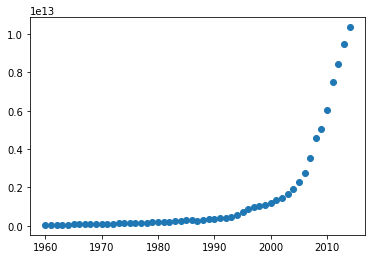

In [4]:
plt.scatter(df['Year'].values, df['Value'].values)
plt.show()

Even though the graph looks like an exponential function, it is known that exponential functions observed in real life are almost always just sigmoidal functions (since no resource can be exhausted to infinity, so every exponential graph must flatten at some point). Thus, we will create a sigmoid model to fit to this data:

In [5]:
def sig_func(x, b_1, b_2):
    return 1/(1 + np.exp(-b_1*(x - b_2)))

y_model = sig_func(df['Year'].values, 0.1, 1990)

Let's look at the sigmoid equation (also called logistic equation) again, but in a different form this time:

$$\hat{y} = \frac{1}{1 + e^{\beta_1(x - \beta_2)}}$$

The parameter $\beta_1$ determines the steepness of the curve i.e. how fast the values rise up from ~ 0 to ~ 1. On the other hand, the parameter $\beta_2$ determines the position of the curve on the x-axis i.e. at what value of x the value of y begins to rise.

Now, lets apply this sigmoid function to the GDP data:

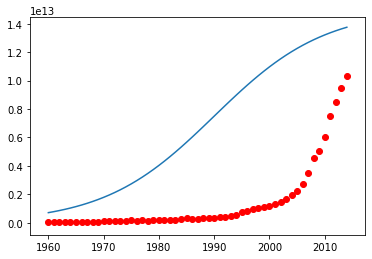

In [6]:
plt.plot(df['Year'].values, y_model*15000000000000)
plt.scatter(df['Year'].values, df['Value'].values, color='red')
plt.show()

As is quite visible, the two graphs don't match up. To make this work, we need to find out the values of $\beta_1$ and $\beta_2$. This is essentially what machine learning does: it finds out the value of these parameters so that the resulting graph overlaps with the given data to a good extent (the phrase 'good extent' is what data scientists have to define for their context).

To begin this, we need to normalize the x and y values for the algorithm to work:

In [7]:
x, y = df['Year'].values/max(df['Year'].values), df['Value'].values/max(df['Value'].values)

Now, the `curve_fit` function from `scipy` can determine the best values for the function we provide to fit the model to the data we provide:

In [8]:
beta, _ = curve_fit(sig_func, x, y)

The values of $\beta_1$ and $\beta_2$ are determined to be:

In [9]:
from IPython.display import display, Latex, Markdown

display(Markdown("{} = {}, {} = {}".format(r"$\beta_1$", beta[0], r"$\beta _2$", beta[1])))

$\beta_1$ = 690.4517103750413, $\beta _2$ = 0.9972071272527439

To see how good our model is, lets plot it on the original dataset:

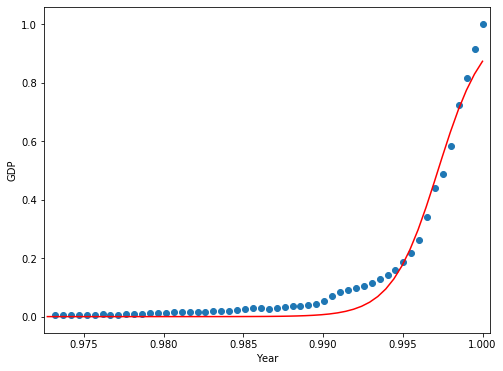

In [10]:
x_new = np.linspace(1960, 2015, 55)
x_new /= max(x_new)
y_new = sig_func(x_new, *beta)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='data')
plt.plot(x_new, y_new, label='model', color='red')
plt.xlim((0.9725, 1.0005))
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

Since this was a study, not a lab, we have nothing to save this time. Thanks for reading, just leave already :)